# EDA 

Vechicle Characteristics & Premium-related EDA

## Load data

In [60]:
import pandas as pd
import altair as alt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import warnings

alt.data_transformers.disable_max_rows()
warnings.filterwarnings('ignore')

In [61]:
data_path = './Dataset of an actual motor vehicle insurance portfolio/Motor v'\
    'ehicle insurance data.csv'

df = pd.read_csv(
    data_path, 
    delimiter=';', 
    parse_dates=[
        'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal',
        'Date_birth', 'Date_driving_licence', 'Date_lapse', 'Year_matriculation'
        ],
    dayfirst=True
    )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    105555 non-null  int64         
 1   Date_start_contract   105555 non-null  datetime64[ns]
 2   Date_last_renewal     105555 non-null  datetime64[ns]
 3   Date_next_renewal     105555 non-null  datetime64[ns]
 4   Date_birth            105555 non-null  datetime64[ns]
 5   Date_driving_licence  105555 non-null  datetime64[ns]
 6   Distribution_channel  105555 non-null  int64         
 7   Seniority             105555 non-null  int64         
 8   Policies_in_force     105555 non-null  int64         
 9   Max_policies          105555 non-null  int64         
 10  Max_products          105555 non-null  int64         
 11  Lapse                 105555 non-null  int64         
 12  Date_lapse            35147 non-null   datetime64[ns]
 13 

In [62]:
df.head()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,2015-11-05,2015-11-05,2016-11-05,1956-04-15,1976-03-20,0,4,1,2,...,0,0,2004-01-01,80,599,7068.0,0,P,NaN,190
1,1,2015-11-05,2016-11-05,2017-11-05,1956-04-15,1976-03-20,0,4,1,2,...,0,0,2004-01-01,80,599,7068.0,0,P,NaN,190
2,1,2015-11-05,2017-11-05,2018-11-05,1956-04-15,1976-03-20,0,4,2,2,...,0,0,2004-01-01,80,599,7068.0,0,P,NaN,190
3,1,2015-11-05,2018-11-05,2019-11-05,1956-04-15,1976-03-20,0,4,2,2,...,0,0,2004-01-01,80,599,7068.0,0,P,NaN,190
4,2,2017-09-26,2017-09-26,2018-09-26,1956-04-15,1976-03-20,0,4,2,2,...,0,0,2004-01-01,80,599,7068.0,0,P,NaN,190


## Check missing values

In [63]:
df.isna().sum()

ID                          0
Date_start_contract         0
Date_last_renewal           0
Date_next_renewal           0
Date_birth                  0
Date_driving_licence        0
Distribution_channel        0
Seniority                   0
Policies_in_force           0
Max_policies                0
Max_products                0
Lapse                       0
Date_lapse              70408
Payment                     0
Premium                     0
Cost_claims_year            0
N_claims_year               0
N_claims_history            0
R_Claims_history            0
Type_risk                   0
Area                        0
Second_driver               0
Year_matriculation          0
Power                       0
Cylinder_capacity           0
Value_vehicle               0
N_doors                     0
Type_fuel                1764
Length                  10329
Weight                      0
dtype: int64

## Transform date variable to time intervals

### Age (years)
`Date_birth` - `Date_last_renewal`

In [64]:
df['Age'] = (df['Date_last_renewal'] - df['Date_birth']) // \
    pd.Timedelta('365 days')
df['Age'].head()

0    59
1    60
2    61
3    62
4    61
Name: Age, dtype: int64

### Driving experience (years)
`Date_driving_licence` - `Date_last_renewal`

In [65]:
df['yoe'] = (df['Date_last_renewal'] - df['Date_driving_licence']) \
    // pd.Timedelta('365 days')
df['yoe'].head()

0    39
1    40
2    41
3    42
4    41
Name: yoe, dtype: int64

### Contract duration (years)
`Date_last_renewal` - `Date_start_contract`

In [66]:
df['contract_duration'] = (df['Date_last_renewal'] - df['Date_start_contract'])\
    // pd.Timedelta('365 days') + 1
df['contract_duration'].head()

0    1
1    2
2    3
3    4
4    1
Name: contract_duration, dtype: int64

## Categorical variables
- Policy and customer characteritics: `Distribution_channel`, `Lapse`,  `Payment`
- Claim history: None
- Vechicle Characteristics: `Type_risk`, `Area`, `Second_driver`, `Type_fuel`

In [67]:
df_cat = df[
    ['Distribution_channel', 'Lapse', 'Payment', 'Type_risk', 'Area', 
     'Second_driver', 'Type_fuel']
     ]

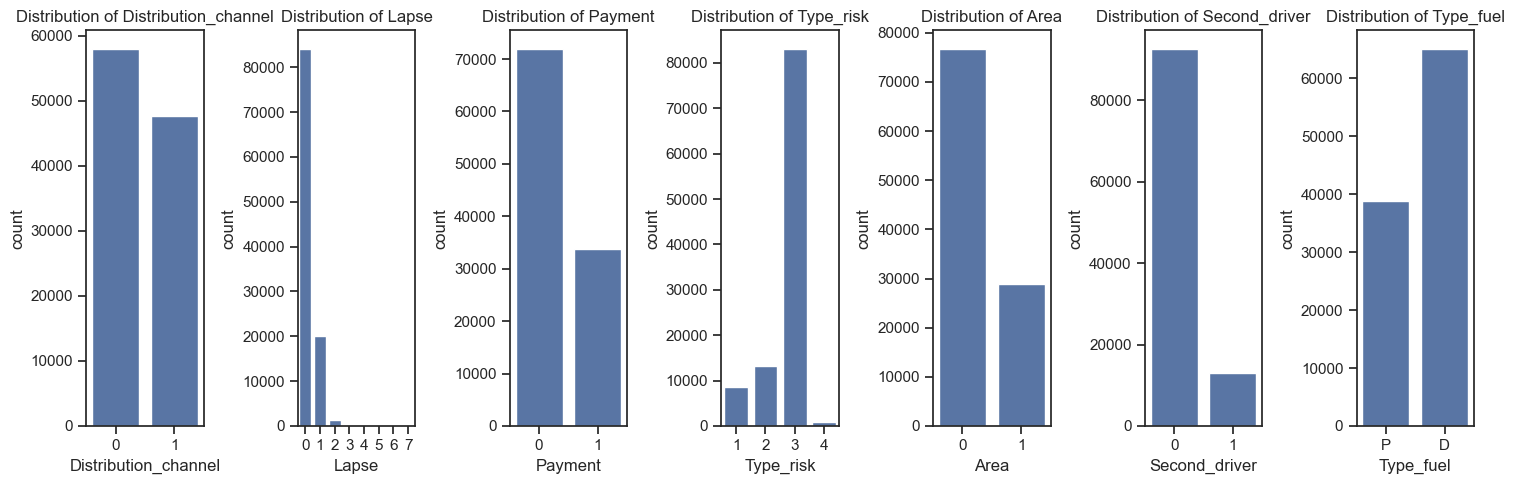

In [68]:
# Create subplots
fig, axes = plt.subplots(1, len(df_cat.columns), figsize=(15, 5))

# Plot each categorical variable distribution in a separate subplot
for i, cat in enumerate(df_cat.columns):
    sns.countplot(x=df[cat], ax=axes[i])
    axes[i].set_title(f'Distribution of {cat}')

plt.tight_layout()
plt.show()

## Numerical variables

Target: `Premium`
- Policy and customer characteritics: 
  - contract_duration
  - Distribution_channel
  - Age
  - yoe
  - Seniority
  - Policies_in_force 
  - Max_policies
  - Max_products
  - Payment

- Claim history: 
  - Cost_claims_year
  - N_claims_year
  - N_claims_history
  - R_Claims_history
- Vechicle Characteristics:
    - type_risk
    - area
    - second_driver
    - year_matriculation
    - power
    - clinder_capacity
    - value_vehicle
    - N_door
    - Type_fuel
    - Length
    - Weight


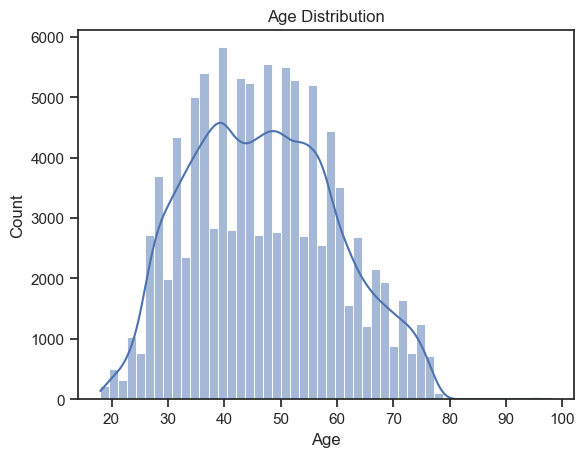

In [69]:
sns.histplot(df['Age'], bins=50, kde=True)
plt.title("Age Distribution")
plt.show()

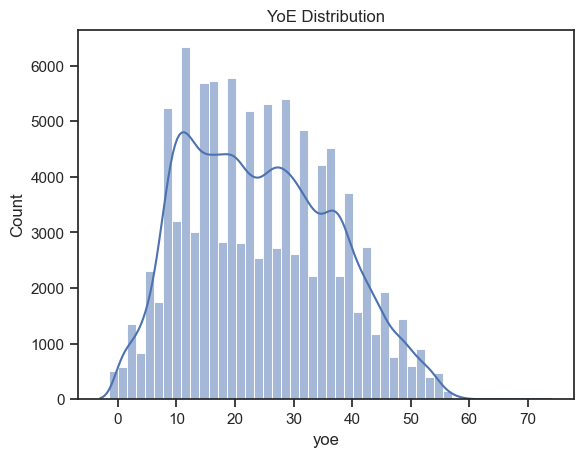

In [70]:
sns.histplot(df['yoe'], bins=50, kde=True)
plt.title("YoE Distribution")
plt.show()

## Vechicle Characteristics
- type_risk (c - 4 classes)
- area (c - binary)
- second_driver (c - binary)
<!-- - year_matriculation -->
- power
- clinder_capacity
- value_vehicle
- N_door
- Type_fuel (c - binary)
- Length
- Weight

In [71]:
df_veh = df[
    [
        'Type_risk', 'Area', 'Second_driver', 'Power', 'Cylinder_capacity', 
        'Value_vehicle', 'N_doors', 'Type_fuel', 'Length', 'Weight', 'Premium'
        ]
    ]
df_veh_numeric = df_veh[
    ['Power', 'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Weight', 'Premium']
]
df_veh_cat = df_veh[['Type_risk', 'Area', 'Second_driver', 'Type_fuel']]

### Scatter plot

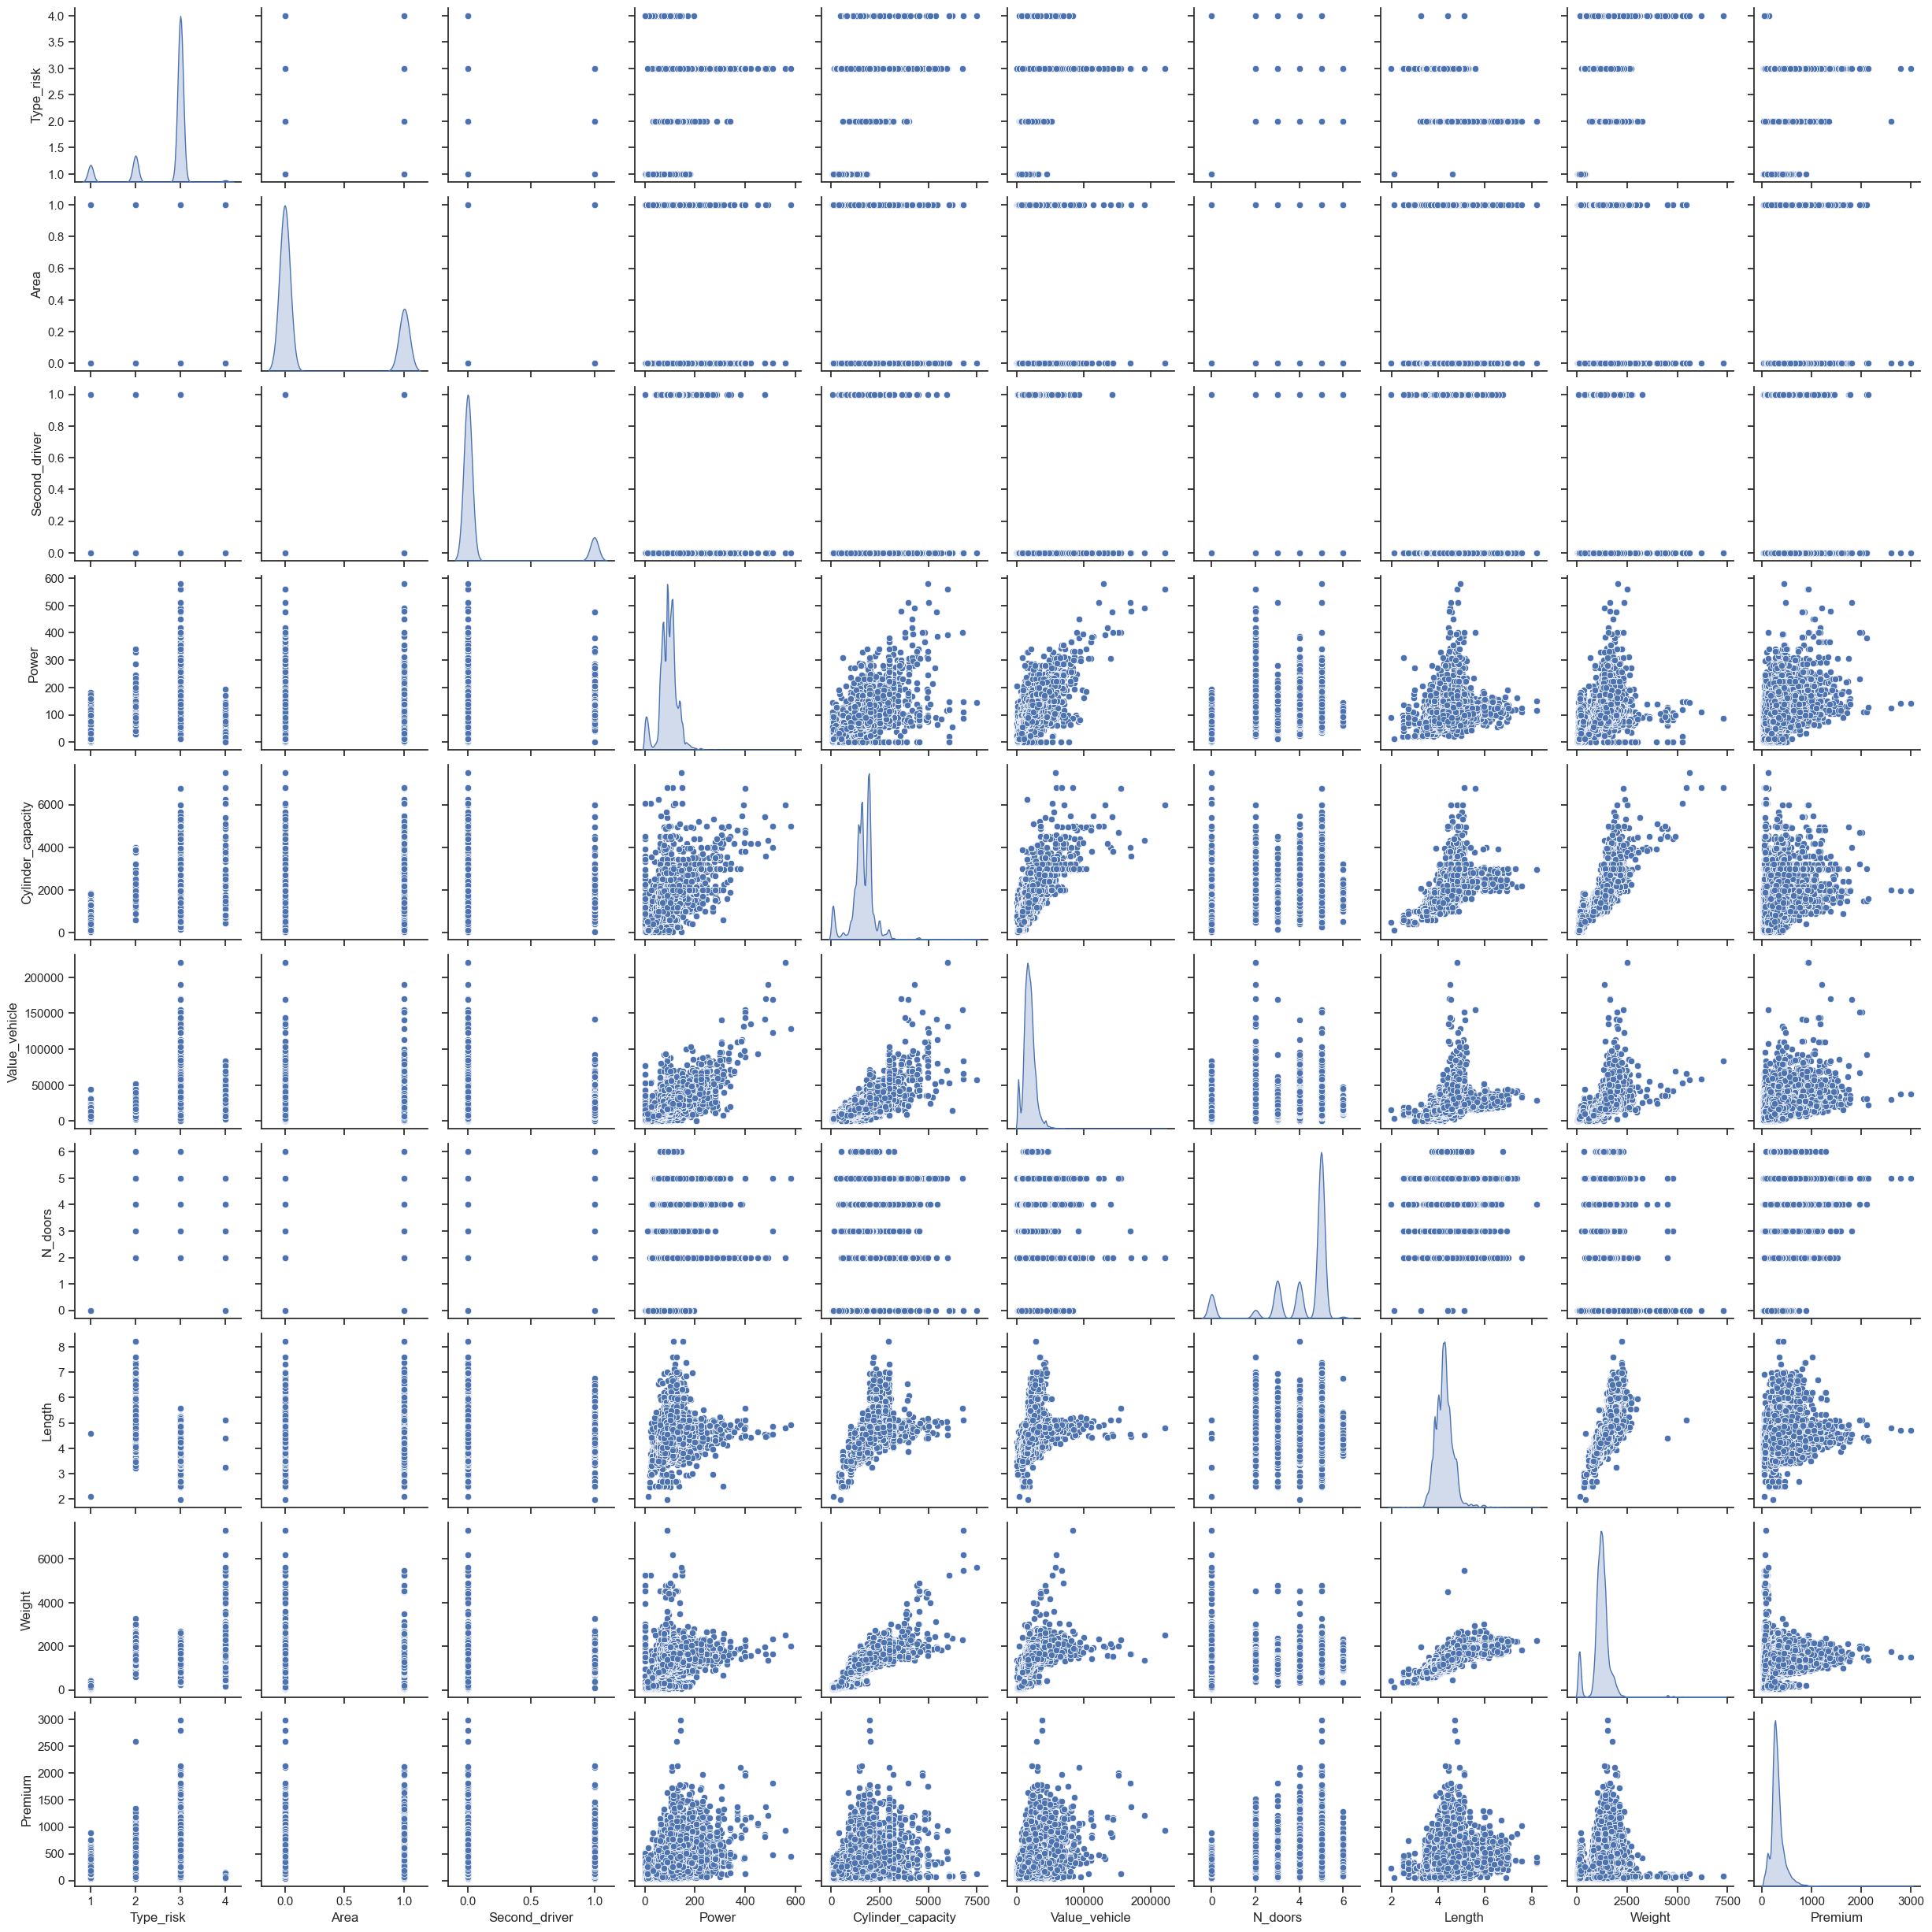

In [72]:
# Scatter plot.
sns.set_theme(style="ticks")

# Check all.
sns.pairplot(
    df_veh,
    kind='scatter', 
    diag_kind='kde'
    )

Observations and finding:

- From the above scatter plot, we can see several linear pairs of features have collinearity.
  - 'Weight' and 'Length'
  - 'Weight' and 'Cylinder_capacity'
  - 'Cylinder_capacity' and 'Value_vehicle'
  - 'Value_vehicle' and 'Power'
Since in our dataset, 'Length' contains a large number of missing vaules, we remove 'Length' in modeling. As a result, we can exclude 'Cylinder_capacity' feature

To confirm our visual observation, calculate VIF for numeric variables.
- Power
- Cylinder_capacity
- Value_vehicle
- N_doors
- Weight

### Collinearity

Calculate VIF for numeric features

In [73]:
df_veh_num_all = df_veh_numeric
df_veh_num_all.head()

,Power,Cylinder_capacity,Value_vehicle,N_doors,Weight,Premium
0,80,599,7068.0,0,190,222.52
1,80,599,7068.0,0,190,213.78
2,80,599,7068.0,0,190,214.84
3,80,599,7068.0,0,190,216.99
4,80,599,7068.0,0,190,213.70


In [74]:
# VIF dataframe
df_veh_num_all = df_veh_num_all.drop(columns=['Premium'])
vif_data = pd.DataFrame()
vif_data["feature"] = df_veh_num_all.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(df_veh_num_all.values, i) \
        for i in range(len(df_veh_num_all.columns))
        ]

print(vif_data)

             feature        VIF
0              Power  21.046904
1  Cylinder_capacity  42.276462
2      Value_vehicle  19.231352
3            N_doors  10.312455
4             Weight  42.257532


In [75]:
# Remove Cylinder_capacity
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_veh_num_all.drop(columns=['Cylinder_capacity']).columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(df_veh_num_all.drop(columns=['Cylinder_capacity']).values, i) \
        for i in range(len(df_veh_num_all.drop(columns=['Cylinder_capacity']).columns))
        ]

print(vif_data)

         feature        VIF
0          Power  19.693500
1  Value_vehicle  19.136497
2        N_doors  10.297927
3         Weight  18.245098


In [76]:
# Remove Power
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_veh_num_all.drop(
    columns=['Cylinder_capacity', 'Power']
    ).columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(
        df_veh_num_all.drop(columns=['Cylinder_capacity', 'Power']
                                ).values, i) \
        for i in range(
            len(
                df_veh_num_all.drop(columns=['Cylinder_capacity', 'Power']
                                        ).columns))
        ]

print(vif_data)

         feature        VIF
0  Value_vehicle  11.277474
1        N_doors   7.742748
2         Weight  18.243744


In [77]:
# Remove 'Weight'
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_veh_num_all.drop(
    columns=['Cylinder_capacity', 'Power', 'Weight']
    ).columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(
        df_veh_num_all.drop(columns=['Cylinder_capacity', 'Power', 'Weight']
                                ).values, i) \
        for i in range(
            len(
                df_veh_num_all.drop(columns=['Cylinder_capacity', 'Power', 'Weight']
                                        ).columns))
        ]

print(vif_data)

         feature       VIF
0  Value_vehicle  4.785358
1        N_doors  4.785358


Observation and finding:

After detecting multicollinearity using a scatter matrix and eliminating high Variance Inflation Factor (VIF) features, 'Value_vehicle' and 'N_doors' left for vehicle characteristics. 
<!-- - [x] Area (c)
- [x] Second_driver (c) -->
- [x] Value_vehicle
- [x] N_doors
<!-- - [x] Type_fuel (c) -->

### Variance & Correlation

In [78]:
df_veh_selected = df_veh[
    ['Area', 'Second_driver', 'Value_vehicle', 'N_doors', 'Type_fuel', 
     'Type_risk']
    ]
df_veh_selected['Premium'] = df_veh['Premium']
df_veh_selected = pd.get_dummies(df_veh_selected, drop_first=True, dtype=int)  # Drop first category to prevent dummy trap
df_veh_selected.head()

,Area,Second_driver,Value_vehicle,N_doors,Type_risk,Premium,Type_fuel_P
0,0,0,7068.0,0,1,222.52,1
1,0,0,7068.0,0,1,213.78,1
2,0,0,7068.0,0,1,214.84,1
3,0,0,7068.0,0,1,216.99,1
4,0,0,7068.0,0,1,213.70,1


In [79]:
# # Variance
variance_values = df_veh_selected[['N_doors', 'Value_vehicle']].var()
variance_values

N_doors          2.285658e+00
Value_vehicle    8.344958e+07
dtype: float64

In [80]:
# # Correlation
corr_matrix = df_veh_selected[['N_doors', 'Value_vehicle','Premium']].corr()
corr_matrix

,N_doors,Value_vehicle,Premium
N_doors,1.000000,0.320980,0.341438
Value_vehicle,0.320980,1.000000,0.415204
Premium,0.341438,0.415204,1.000000


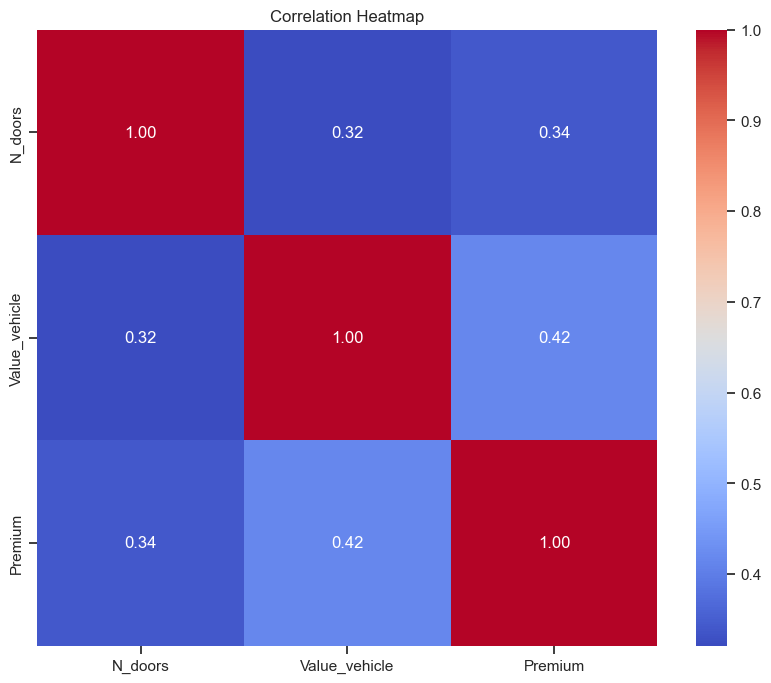

In [81]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

## Premium-related EDA

In [82]:
df_veh_selected = df_veh[
    ['Area', 'Second_driver', 'Value_vehicle', 'N_doors', 'Type_risk', 'Premium']
    ]

#### Target distribution

Text(0.5, 1.0, 'Histogram & Density - Premium')

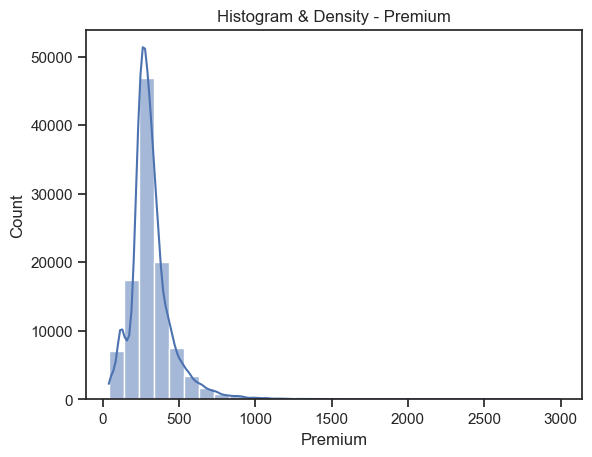

In [83]:
sns.histplot(df_veh_selected['Premium'], kde=True, bins=30).set_title('Histogram & Density - Premium')

#### Vehicle-related variables vs. Premium

Box-plot to check relationship between categorical variables and premium

Scatter plot to check relationship bewteen numerical variables and premium

In [84]:
# Helper function

def box_plot_grouped(df, group, target):
    df_melted = df[[group, target]].melt(
    id_vars=[group], var_name="Feature", value_name="Value"
    )

    # Grouped box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Feature", y="Value", hue=group, data=df_melted)
    plt.title(f"Grouped Box Plot ({group})")
    plt.legend(title=group)
    return plt

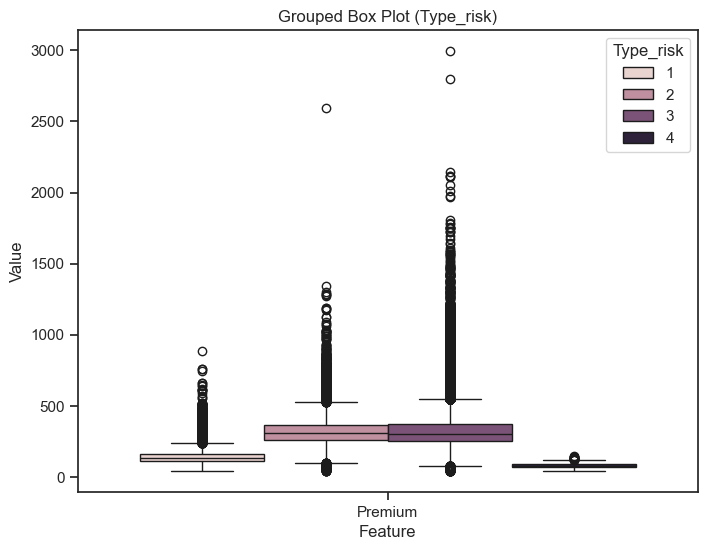

In [85]:
plot = box_plot_grouped(df_veh_selected, 'Type_risk', 'Premium')
plot.show()

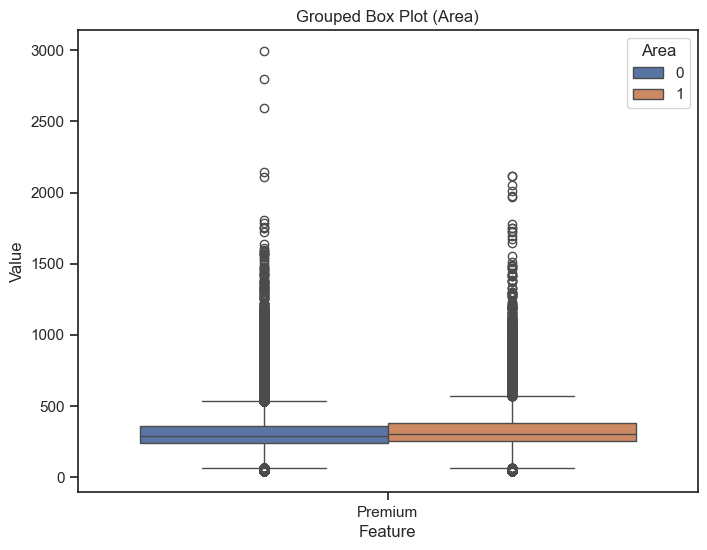

In [86]:
plot = box_plot_grouped(df_veh_selected, 'Area', 'Premium')
plot.show()

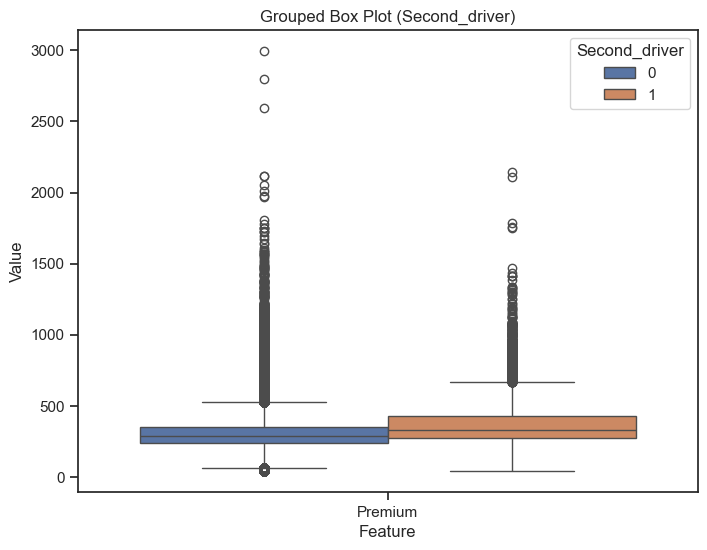

In [87]:
plot = box_plot_grouped(df_veh_selected, 'Second_driver', 'Premium')
plot.show()

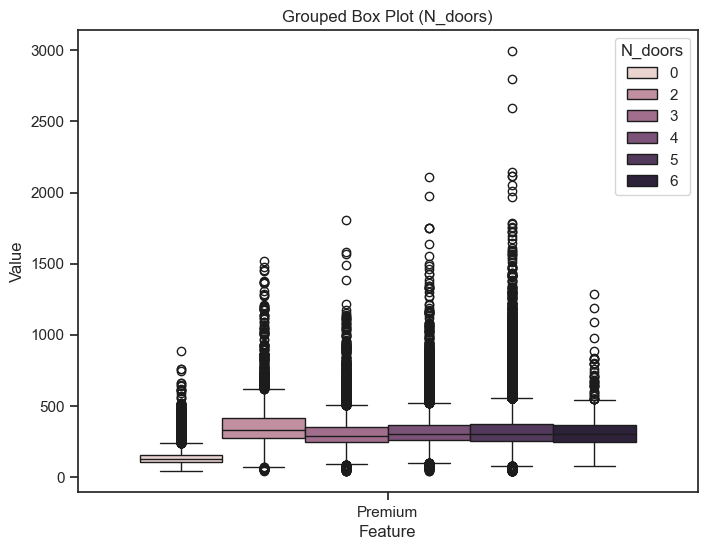

In [88]:
plot = box_plot_grouped(df_veh_selected, 'N_doors', 'Premium')
plot.show()

Text(0, 0.5, 'premium')

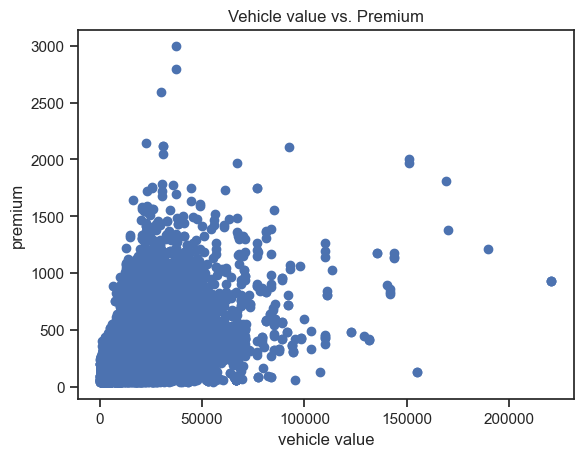

In [89]:
plt.scatter(df_veh_selected['Value_vehicle'], df_veh_selected['Premium'], )
plt.title("Vehicle value vs. Premium")
plt.xlabel("vehicle value")
plt.ylabel("premium")

#### Claim-related variables vs. Premium
- Cost_claims_year
- N_claims_year
- N_claims_history


Box-plot to check relationship between categorical variables and premium

Scatter plot to check relationship bewteen numerical variables and premium

In [90]:
df_clm = df[
    [
        'Cost_claims_year', 'N_claims_year', 'N_claims_history', 'R_Claims_history'
        ]
    ]

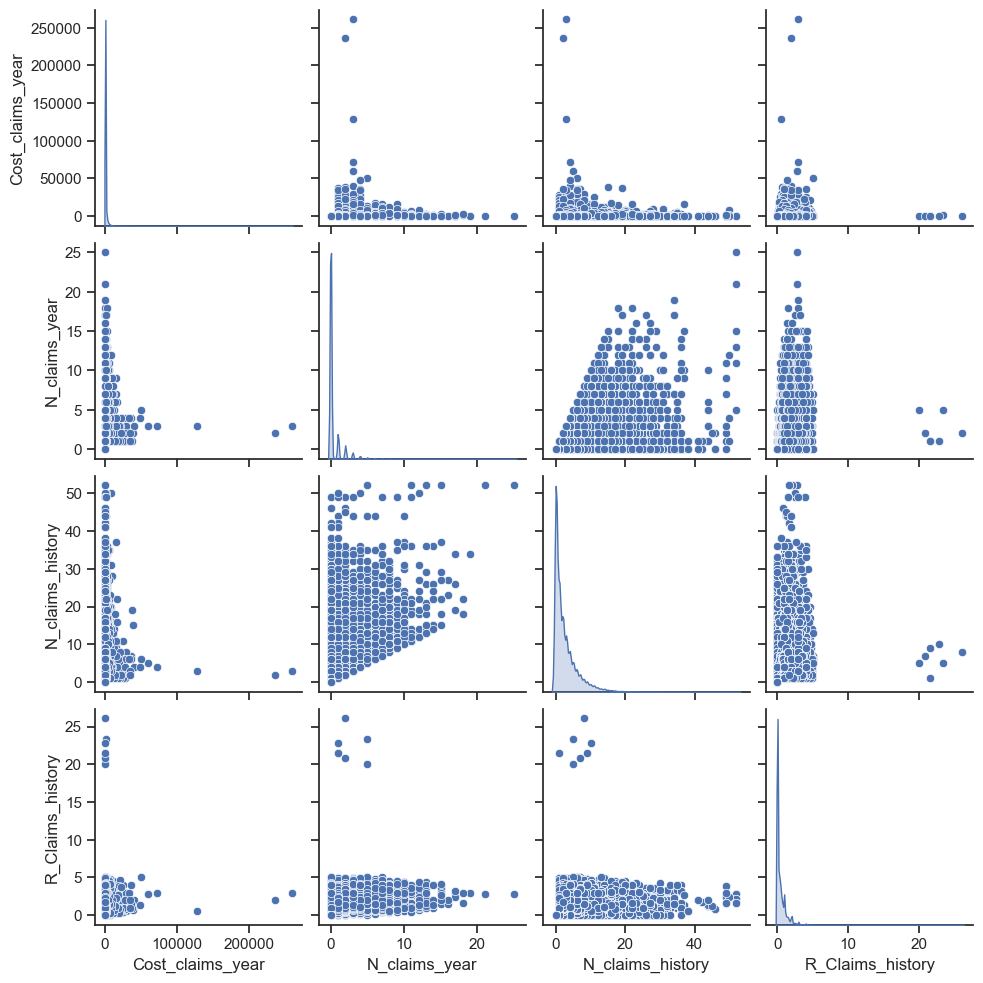

In [91]:
# Scatter plot.
sns.set_theme(style="ticks")

# Check all.
sns.pairplot(
    df_clm,
    kind='scatter', 
    diag_kind='kde'
    )

In [92]:
# Collinearity.

vif_data = pd.DataFrame()
vif_data["feature"] = df_clm.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(df_clm.values, i) \
        for i in range(len(df_clm.columns))
        ]
print(vif_data)
"""Finding: No significant collinearity among claim variables."""

            feature       VIF
0  Cost_claims_year  1.058348
1     N_claims_year  1.769384
2  N_claims_history  1.548560
3  R_Claims_history  1.947315


'Finding: No significant collinearity among claim variables.'

In [93]:
# Variance
variance_values = df_clm.var()
variance_values

Cost_claims_year    2.181861e+06
N_claims_year       1.221064e+00
N_claims_history    1.506698e+01
R_Claims_history    5.110582e-01
dtype: float64

In [94]:
# # Correlation
corr_matrix = df_clm.corr()
corr_matrix

,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history
Cost_claims_year,1.000000,0.199022,0.068658,0.169467
N_claims_year,0.199022,1.000000,0.392514,0.565950
N_claims_history,0.068658,0.392514,1.000000,0.387687
R_Claims_history,0.169467,0.565950,0.387687,1.000000


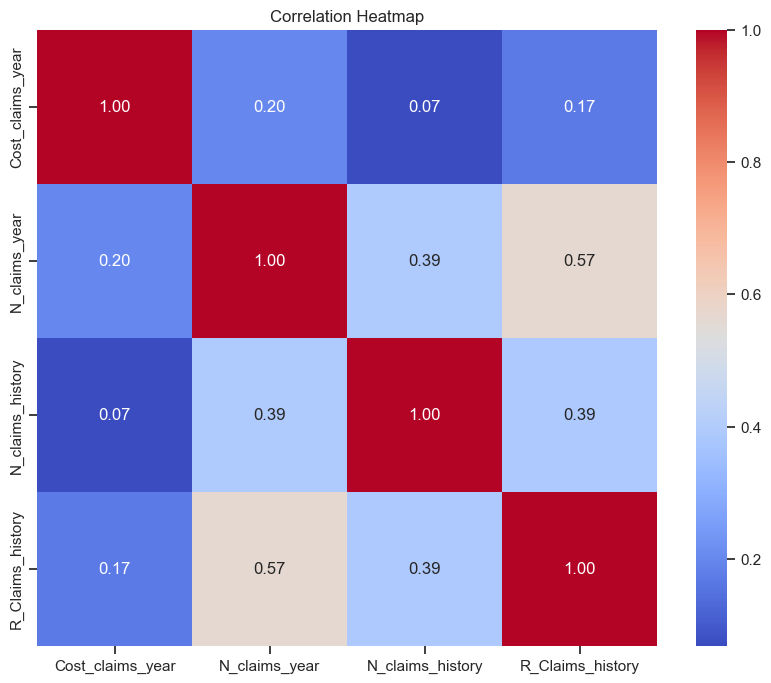

In [95]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

#### Policy/customer-related variables vs. Premium
  - contract_duration
  - Distribution_channel (c)
  - Age
  - yoe
  - Seniority
  - Policies_in_force 
  - Max_policies
  - Max_products
  - Payment (c)

Box-plot to check relationship between categorical variables and premium

Scatter plot to check relationship bewteen numerical variables and premium

In [96]:
df_cum = df[
    [
        'contract_duration', 'Distribution_channel', 'Age', 'yoe', 'Seniority', 
        'Policies_in_force', 'Max_policies', 'Max_products', 'Payment', 'Premium'
        ]
    ]
df_veh_numeric = df_cum[
        [
        'contract_duration', 'Age', 'yoe', 'Seniority', 
        'Policies_in_force', 'Max_policies', 'Max_products', 'Premium'
        ]
]
df_veh_cat = df_cum[['Distribution_channel', 'Payment']]

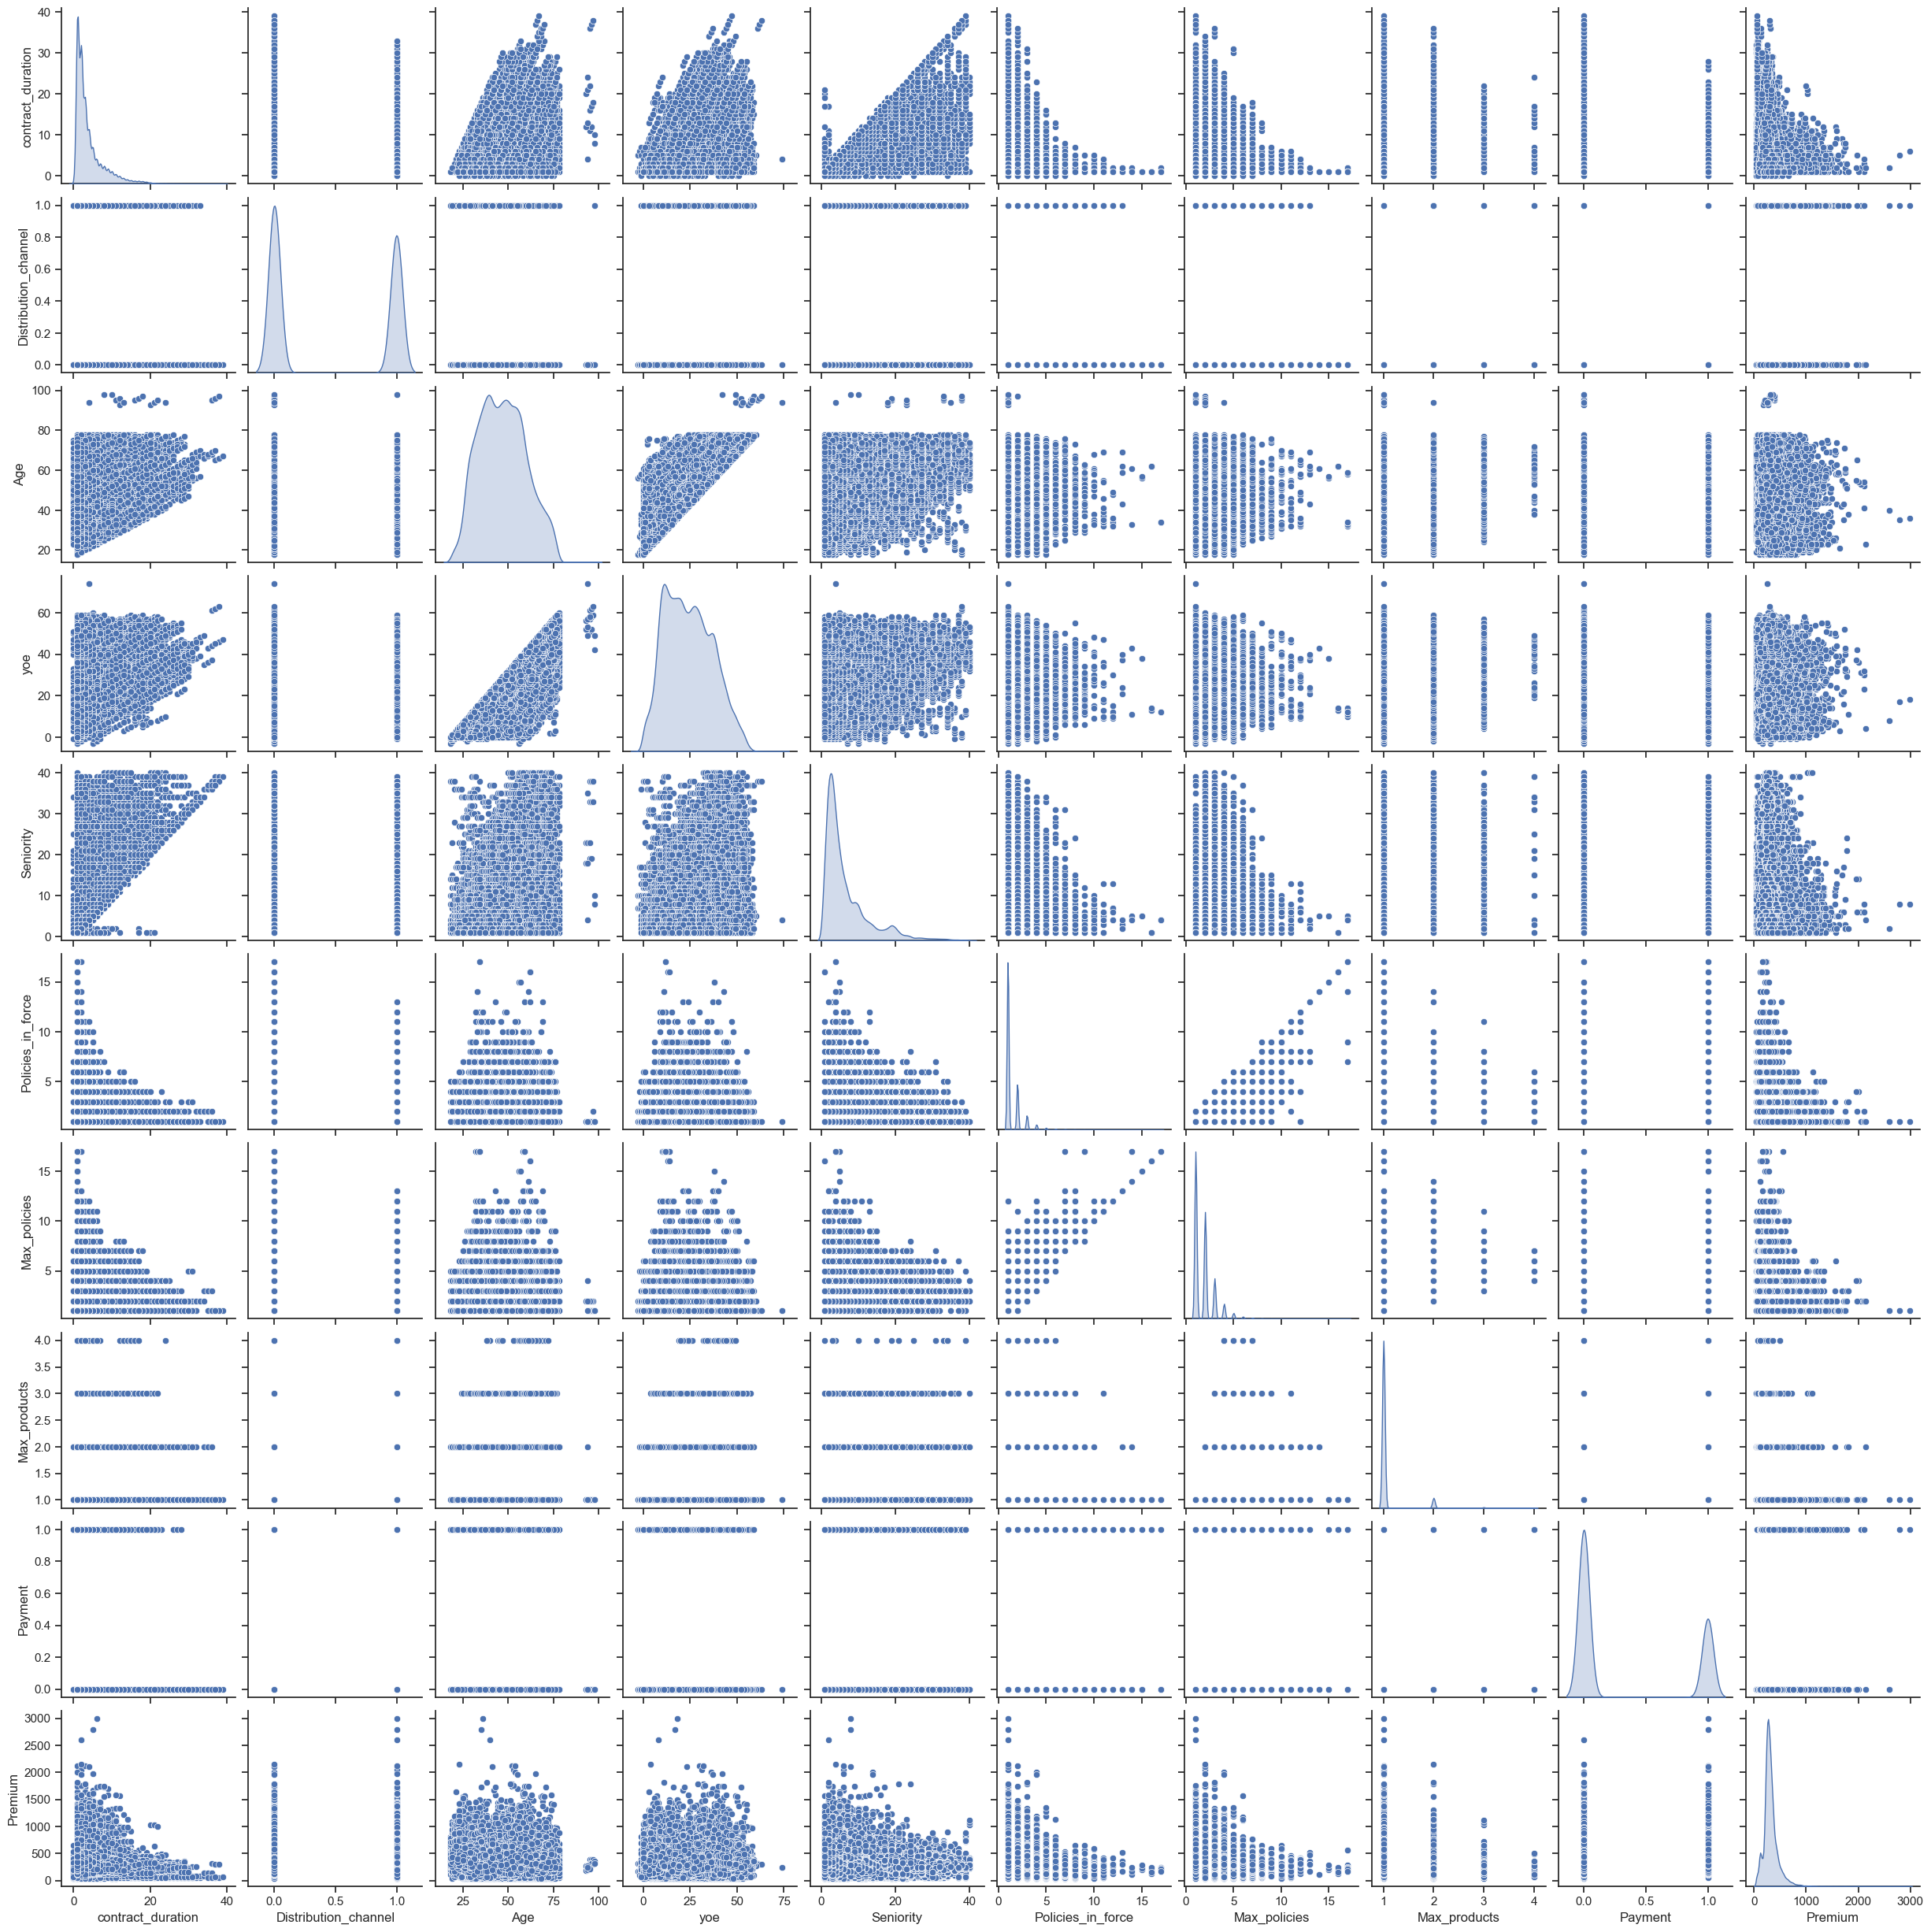

In [97]:
# Scatter plot.
sns.set_theme(style="ticks")

# Check all.
sns.pairplot(
    df_cum,
    kind='scatter', 
    diag_kind='kde'
    )

Observation and findings:
- From the above scatter plot, we can see several pairs of features have collinearity.
  - 'age' and 'yoe'

In [98]:
# Convert categorical variables into dummy variables
df_cum_num_all = pd.get_dummies(df_cum, drop_first=True, dtype=int)  # Drop first category to prevent dummy trap
df_cum_num_all.head()

,contract_duration,Distribution_channel,Age,yoe,Seniority,Policies_in_force,Max_policies,Max_products,Payment,Premium
0,1,0,59,39,4,1,2,1,0,222.52
1,2,0,60,40,4,1,2,1,0,213.78
2,3,0,61,41,4,2,2,1,0,214.84
3,4,0,62,42,4,2,2,1,0,216.99
4,1,0,61,41,4,2,2,1,1,213.70


In [99]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_cum_num_all.drop(columns=['Premium']).columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(df_cum_num_all.values, i) \
        for i in range(len(df_cum_num_all.drop(columns=['Premium']).columns))
        ]

print(vif_data)

                feature        VIF
0     contract_duration   4.019697
1  Distribution_channel   1.944593
2                   Age  41.173347
3                   yoe  18.407390
4             Seniority   4.907286
5     Policies_in_force   9.645077
6          Max_policies  11.497264
7          Max_products  13.628966
8               Payment   1.630365


In [100]:
# Drop Age
vif_data = pd.DataFrame()
vif_data["feature"] = df_cum_num_all.drop(columns=['Premium', 'Age']).columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(df_cum_num_all.drop(columns=['Premium', 'Age']).values, i) \
        for i in range(len(df_cum_num_all.drop(columns=['Premium', 'Age']).columns))
        ]

print(vif_data)

                feature        VIF
0     contract_duration   3.937640
1  Distribution_channel   1.837424
2                   yoe   4.665172
3             Seniority   4.899353
4     Policies_in_force   9.414129
5          Max_policies  11.393109
6          Max_products   8.583957
7               Payment   1.466203


In [101]:
# Drop Max_policies
vif_data = pd.DataFrame()
vif_data["feature"] = df_cum_num_all.drop(columns=['Premium', 'Age', 'Max_policies']).columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(df_cum_num_all.drop(columns=['Premium', 'Age', 'Max_policies']).values, i) \
        for i in range(len(df_cum_num_all.drop(columns=['Premium', 'Age', 'Max_policies']).columns))
        ]

print(vif_data)

                feature       VIF
0     contract_duration  3.875262
1  Distribution_channel  1.827157
2                   yoe  4.663908
3             Seniority  4.522597
4     Policies_in_force  3.574611
5          Max_products  8.103423
6               Payment  1.466137


Observation and finding:

After detecting multicollinearity using a scatter matrix and eliminating high Variance Inflation Factor (VIF) features.
- [x] contract_duration
- [x] Distribution_channel (c)
- [x] yoe
- [x] Seniority
- [x] Policies_in_force
- [x] Max_products
- [x] Payment (c)

In [102]:
df_cum_selected = df_cum_num_all[
    ['contract_duration', 'Distribution_channel', 'yoe', 'Seniority', 
     'Policies_in_force', 'Max_products', 'Payment']
    ]
df_cum_selected['Premium'] = df_cum['Premium']

In [103]:
# # Variance
variance_values = df_cum_selected.drop(columns=['Payment', 'Distribution_channel']).var()
variance_values

contract_duration       15.255508
yoe                    155.879755
Seniority               39.236587
Policies_in_force        0.861977
Max_products             0.071721
Premium              19860.692425
dtype: float64

In [104]:
# Correlation
cor_matrix = df_cum_selected.drop(columns=['Payment', 'Distribution_channel']).corr()
cor_matrix

,contract_duration,yoe,Seniority,Policies_in_force,Max_products,Premium
contract_duration,1.000000,0.190288,0.681207,-0.140910,0.075999,-0.066503
yoe,0.190288,1.000000,0.223872,0.060541,0.106982,-0.114348
Seniority,0.681207,0.223872,1.000000,0.048138,0.232416,-0.069821
Policies_in_force,-0.140910,0.060541,0.048138,1.000000,0.162403,-0.092465
Max_products,0.075999,0.106982,0.232416,0.162403,1.000000,-0.090041
Premium,-0.066503,-0.114348,-0.069821,-0.092465,-0.090041,1.000000


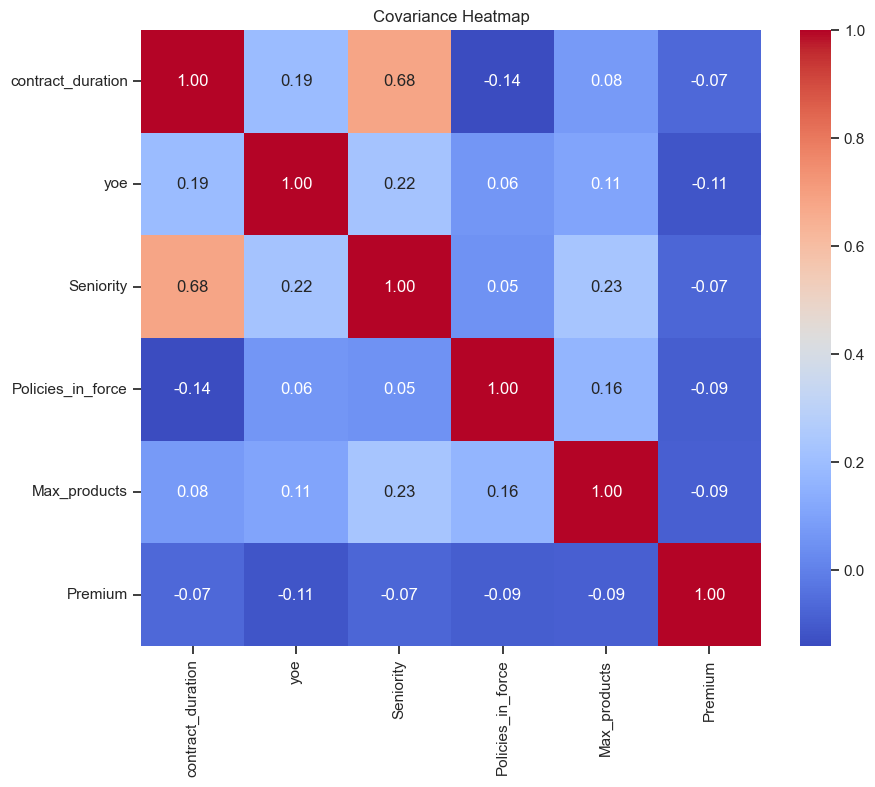

In [105]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Covariance Heatmap")
plt.show()

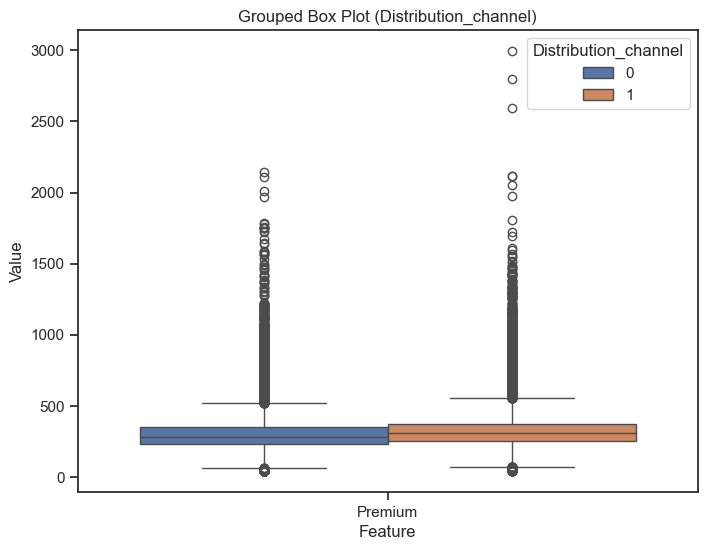

In [106]:
plot = box_plot_grouped(df_cum_selected, 'Distribution_channel', 'Premium')
plot.show()

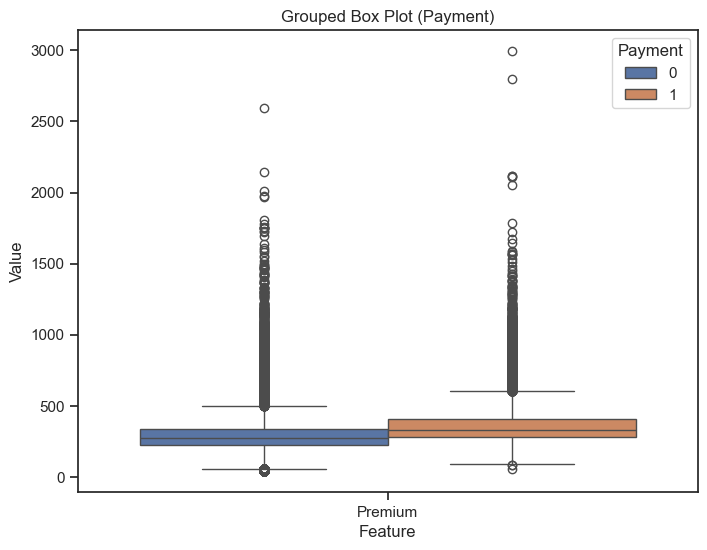

In [107]:
plot = box_plot_grouped(df_cum_selected, 'Payment', 'Premium')
plot.show()

### All variables vs. Premium

In [108]:
df_selected = df[
    [
        'N_doors', 'Value_vehicle',
        'Cost_claims_year', 'N_claims_year', 'N_claims_history', 'R_Claims_history',
        'contract_duration', 'yoe', 'Seniority', 'Policies_in_force', 'Max_products',
        'Premium'
        ]
    ]
x_columns1 = [
        'N_doors', 'Value_vehicle',
        ]
x_columns2 = [
        'Cost_claims_year', 'N_claims_year', 'N_claims_history', 'R_Claims_history',
        ]
x_columns3 = [
        'contract_duration', 'yoe', 'Seniority', 'Policies_in_force', 'Max_products',
        ]

In [109]:
# covariate
# numeric variable
corr_matrix = df_selected.corr()
corr_matrix


,N_doors,Value_vehicle,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,contract_duration,yoe,Seniority,Policies_in_force,Max_products,Premium
N_doors,1.000000,0.320980,0.017452,0.050852,0.060078,0.085392,-0.036673,-0.030832,-0.034382,-0.107895,-0.176379,0.341438
Value_vehicle,0.320980,1.000000,0.028801,0.068106,0.081700,0.088127,-0.060767,0.016377,-0.030892,0.021039,-0.075031,0.415204
Cost_claims_year,0.017452,0.028801,1.000000,0.199022,0.068658,0.169467,-0.036780,-0.026472,-0.022437,0.014295,-0.005411,0.053662
N_claims_year,0.050852,0.068106,0.199022,1.000000,0.392514,0.565950,-0.112975,-0.051162,-0.043957,0.176735,-0.000132,0.092688
N_claims_history,0.060078,0.081700,0.068658,0.392514,1.000000,0.387687,0.202186,0.060770,0.430183,0.233066,0.167000,0.117130
R_Claims_history,0.085392,0.088127,0.169467,0.565950,0.387687,1.000000,-0.114154,-0.087713,-0.097347,0.087487,-0.020508,0.174721
contract_duration,-0.036673,-0.060767,-0.036780,-0.112975,0.202186,-0.114154,1.000000,0.190288,0.681207,-0.140910,0.075999,-0.066503
yoe,-0.030832,0.016377,-0.026472,-0.051162,0.060770,-0.087713,0.190288,1.000000,0.223872,0.060541,0.106982,-0.114348
Seniority,-0.034382,-0.030892,-0.022437,-0.043957,0.430183,-0.097347,0.681207,0.223872,1.000000,0.048138,0.232416,-0.069821
Policies_in_force,-0.107895,0.021039,0.014295,0.176735,0.233066,0.087487,-0.140910,0.060541,0.048138,1.000000,0.162403,-0.092465


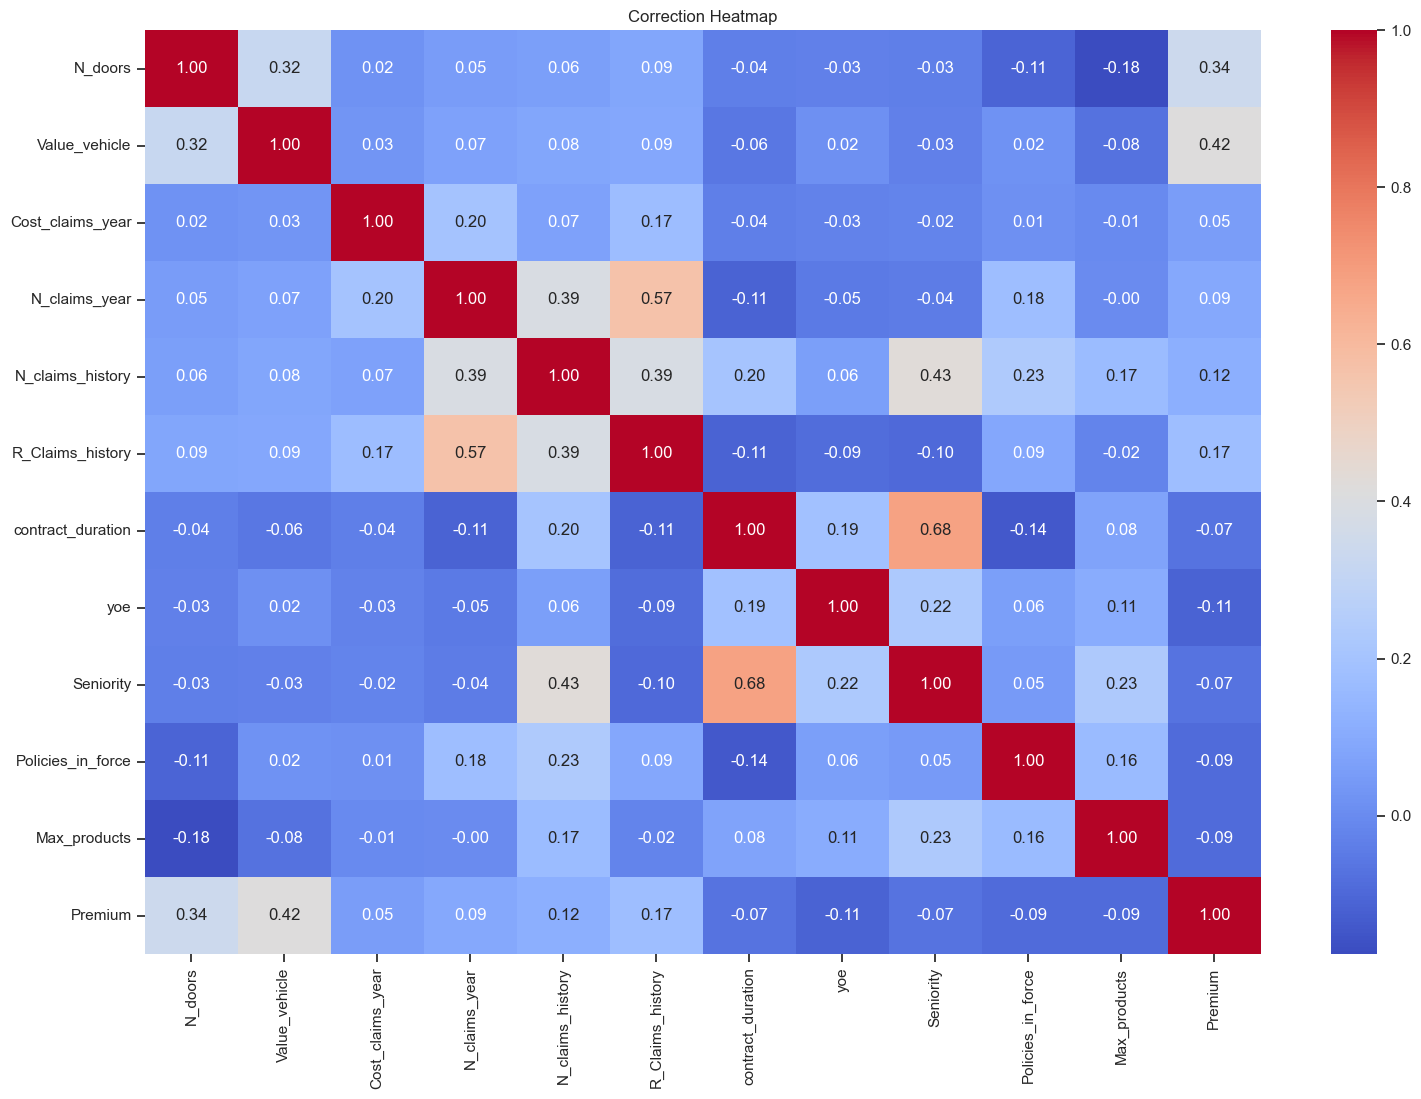

In [110]:
# Plot heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correction Heatmap")
plt.show()

In [111]:
df_melted = df_selected.melt(id_vars=["Premium"], var_name="X_Variables", value_name="X_Values")

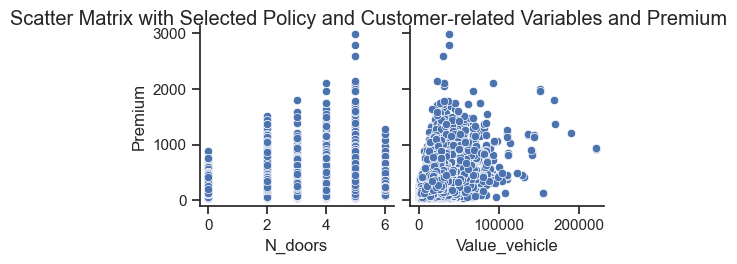

In [112]:
# Scatter matrix using pairplot
sns.pairplot(df, y_vars=["Premium"], x_vars=x_columns1, kind="scatter")
# sns.pairplot(df, y_vars=["Premium"], x_vars=x_columns, kind='hist')

# Show plot
plt.suptitle("Scatter Matrix with Selected Policy and Customer-related Variables and Premium", y=1.02)
plt.show()

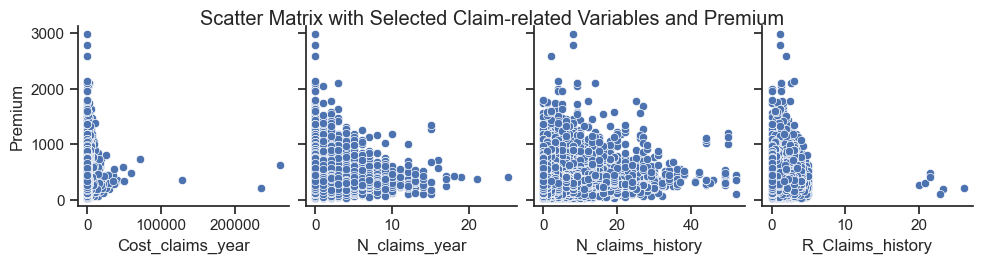

In [113]:
# Scatter matrix using pairplot
sns.pairplot(df, y_vars=["Premium"], x_vars=x_columns2, kind="scatter")
# sns.pairplot(df, y_vars=["Premium"], x_vars=x_columns, kind='hist')

# Show plot
plt.suptitle("Scatter Matrix with Selected Claim-related Variables and Premium", y=1.02)
plt.show()

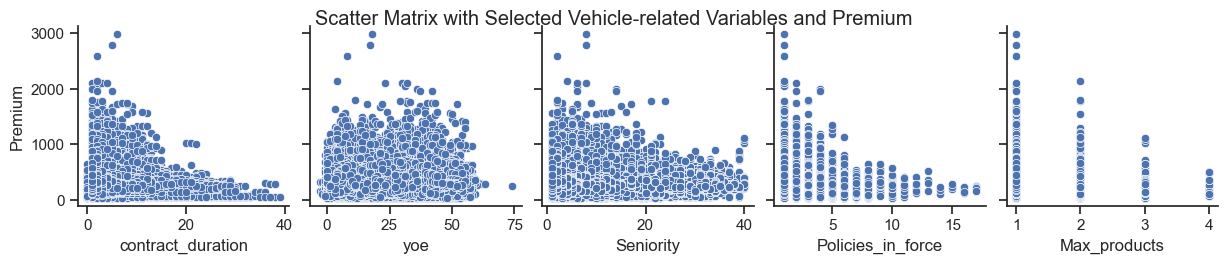

In [114]:
# Scatter matrix using pairplot
sns.pairplot(df, y_vars=["Premium"], x_vars=x_columns3, kind="scatter")
# sns.pairplot(df, y_vars=["Premium"], x_vars=x_columns, kind='hist')

# Show plot
plt.suptitle("Scatter Matrix with Selected Vehicle-related Variables and Premium", y=1.02)
plt.show()